In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans


In [3]:
import os
path = r"/content/drive/MyDrive/HARP_DATASET/1_day_image/square_images_size224"
os.chdir(path)

spectrograms = []

with os.scandir(path) as files:
    for file in files:
        if file.name.endswith('.png'):
            spectrograms.append(file.name)

print(len(spectrograms))

3269


In [4]:
import numpy as np
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import matplotlib.pyplot as plt
%matplotlib inline

def extract_spectrograms_features_as_object_edge_feature(spectrograms: list) -> list:

  spectrograms_extracted = []

  for spectrogram in spectrograms:
    image = imread(spectrogram, as_gray=True)
    #calculating horizontal edges using prewitt kernel
    edges_prewitt_horizontal = prewitt_h(image)
    #calculating vertical edges using prewitt kernel
    edges_prewitt_vertical = prewitt_v(image)

    features = np.reshape(edges_prewitt_vertical, (224*224))

    spectrograms_extracted.append(features)

    
  return spectrograms_extracted


spectrograms_as_array = extract_spectrograms_features_as_object_edge_feature(spectrograms)
  
print(len(spectrograms_as_array))


3269


[0. 0. 0. ... 0. 0. 0.]


In [35]:
x_train, x_test = train_test_split(spectrograms_as_array, random_state=22, test_size=0.20)

In [42]:
print(x_train)

[0. 0. 0. ... 0. 0. 0.]


In [36]:
x_train = x_train[0]
x_test = x_test[0]

In [37]:


print(x_train)
print(x_train.min())
print(x_test.max())

[0. 0. 0. ... 0. 0. 0.]
-0.9762494117647059
0.9753069281045752


In [8]:
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

In [20]:
total_clusters = 4
kmeans = MiniBatchKMeans(n_clusters = total_clusters)# Fitting the model to training set
kmeans.fit(X_train)


MiniBatchKMeans(n_clusters=4)

In [21]:
groups = {}
def extract_groups():
  for spectrogram_name, label in zip(spectrograms, kmeans.labels_):
    if label not in groups:
      groups[label] = []
    groups[label].append(spectrogram_name)

extract_groups()

In [22]:
from keras.preprocessing.image import load_img 

def view_cluster(cluster, n_pictures=30):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to n_pictures images to be shown at a time
    if len(files) > n_pictures:
        print(f"Clipping cluster size from {len(files)} to {n_pictures}")
        files = files[:(n_pictures-1)]
    # plot each image in the cluster
    print("Cluster " + str(cluster) + " ------------------------------------------------------------------------------------------------------------------------------------------------------------------- ")  
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

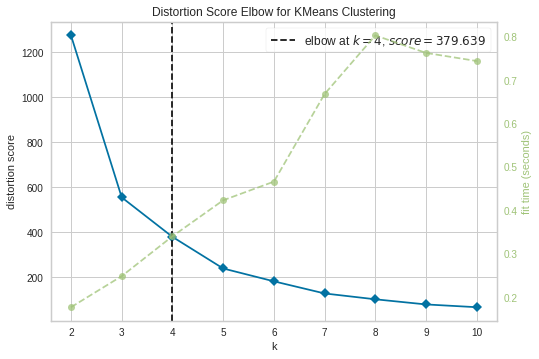

In [23]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
model = KElbowVisualizer(KMeans(), k=10)

model.fit(X_train)

model.show()


In [24]:
print(kmeans.labels_[:500])
print(len(kmeans.labels_))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 1 1 0 0 0 0 0 2 2 0 0 1 1 0 0 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 1 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 2 2 0 0 3 3 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 1 1 1 0 0 0 0 0 2 2 2 0 1 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 1 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 2 0 0 3 3 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [25]:
extract_groups()

Clipping cluster size from 5348 to 50
Cluster 0 ------------------------------------------------------------------------------------------------------------------------------------------------------------------- 


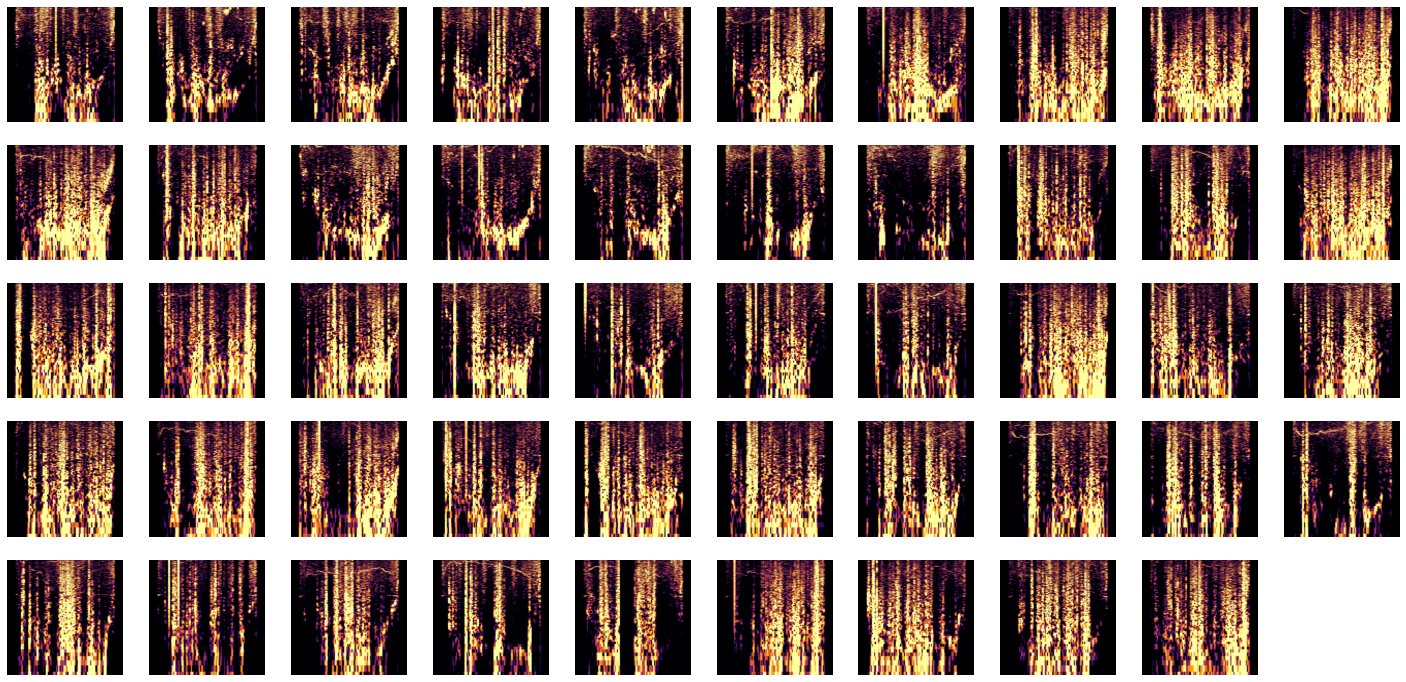

In [26]:
view_cluster(0,50)

Clipping cluster size from 770 to 50
Cluster 1 ------------------------------------------------------------------------------------------------------------------------------------------------------------------- 


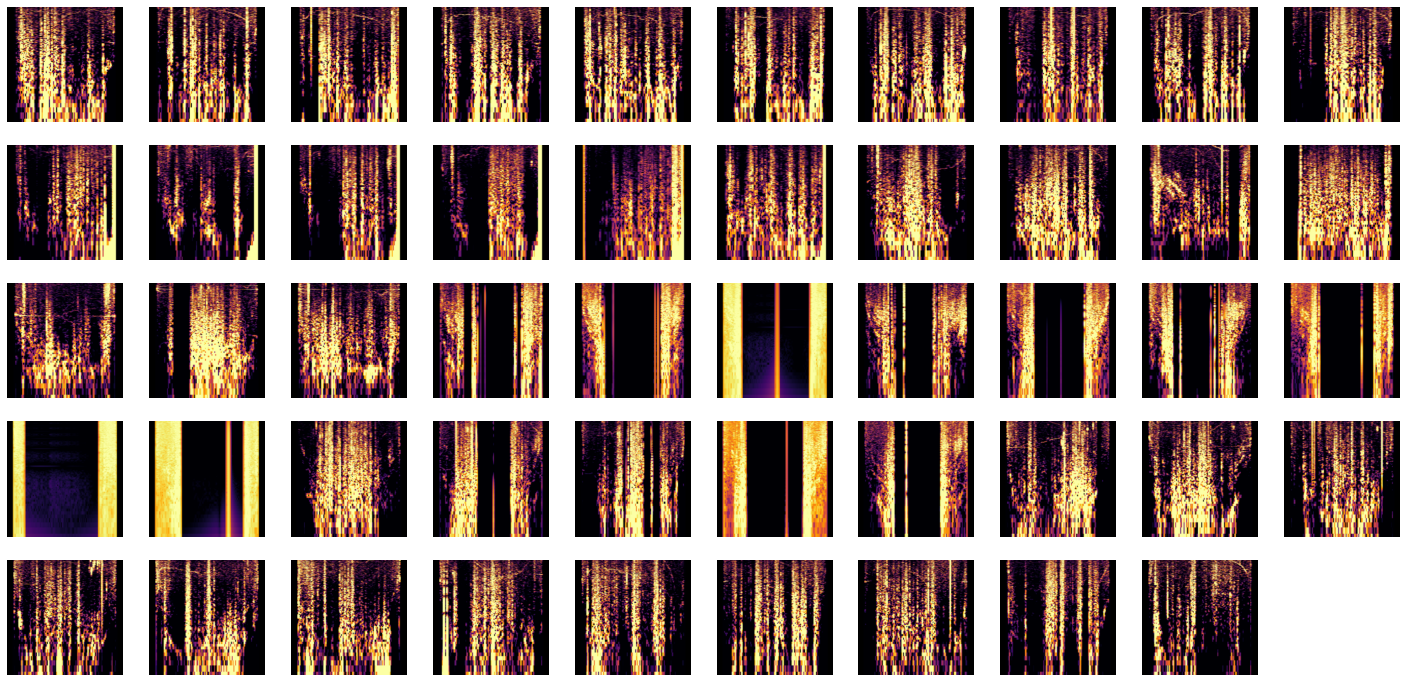

In [27]:
view_cluster(1,50)

Clipping cluster size from 362 to 50
Cluster 2 ------------------------------------------------------------------------------------------------------------------------------------------------------------------- 


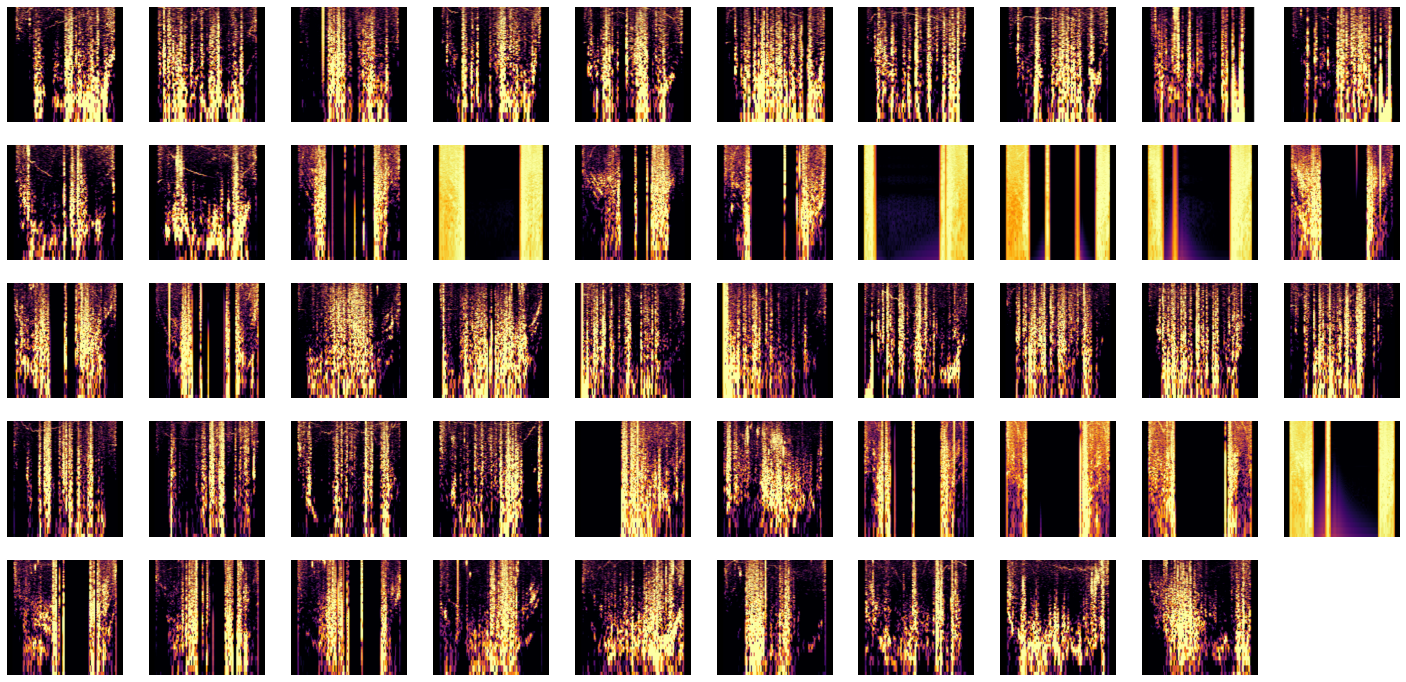

In [28]:
view_cluster(2,50)

Clipping cluster size from 58 to 50
Cluster 3 ------------------------------------------------------------------------------------------------------------------------------------------------------------------- 


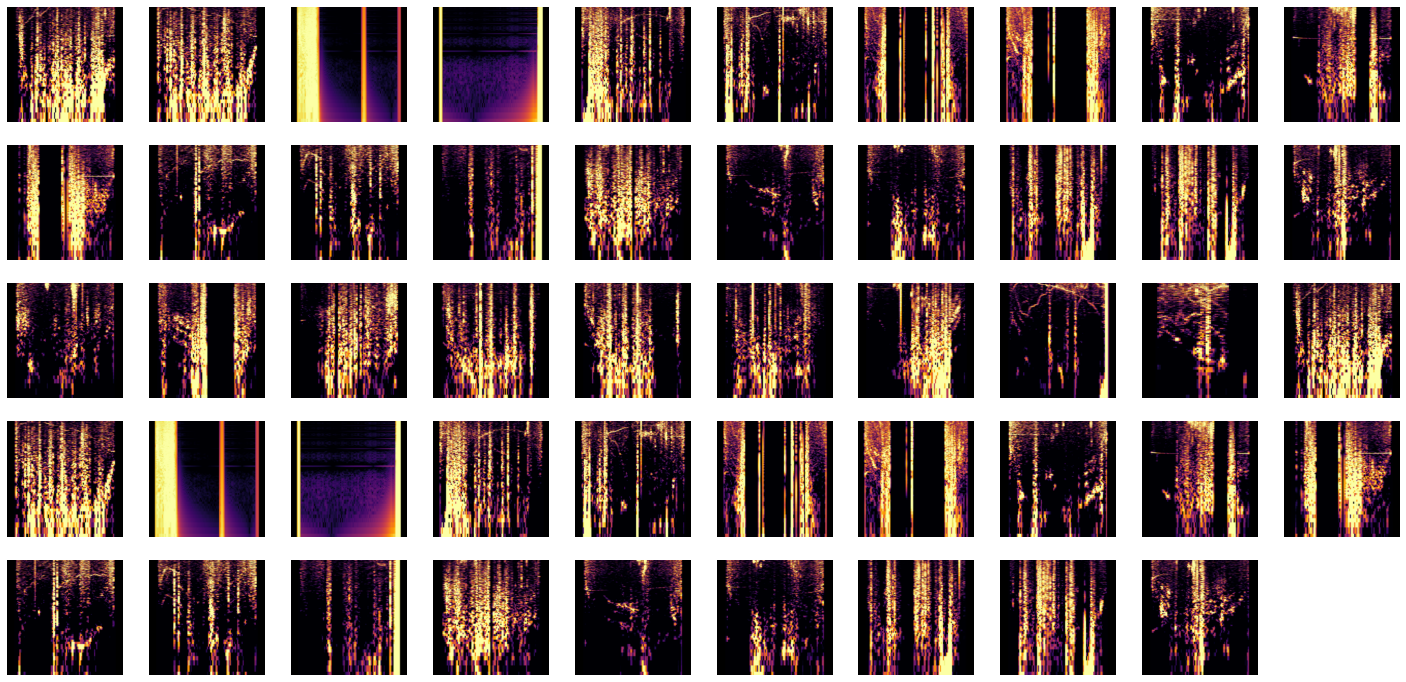

In [29]:
view_cluster(3,50)

Clipping cluster size from 1058 to 50
Cluster 4 ------------------------------------------------------------------------------------------------------------------------------------------------------------------- 


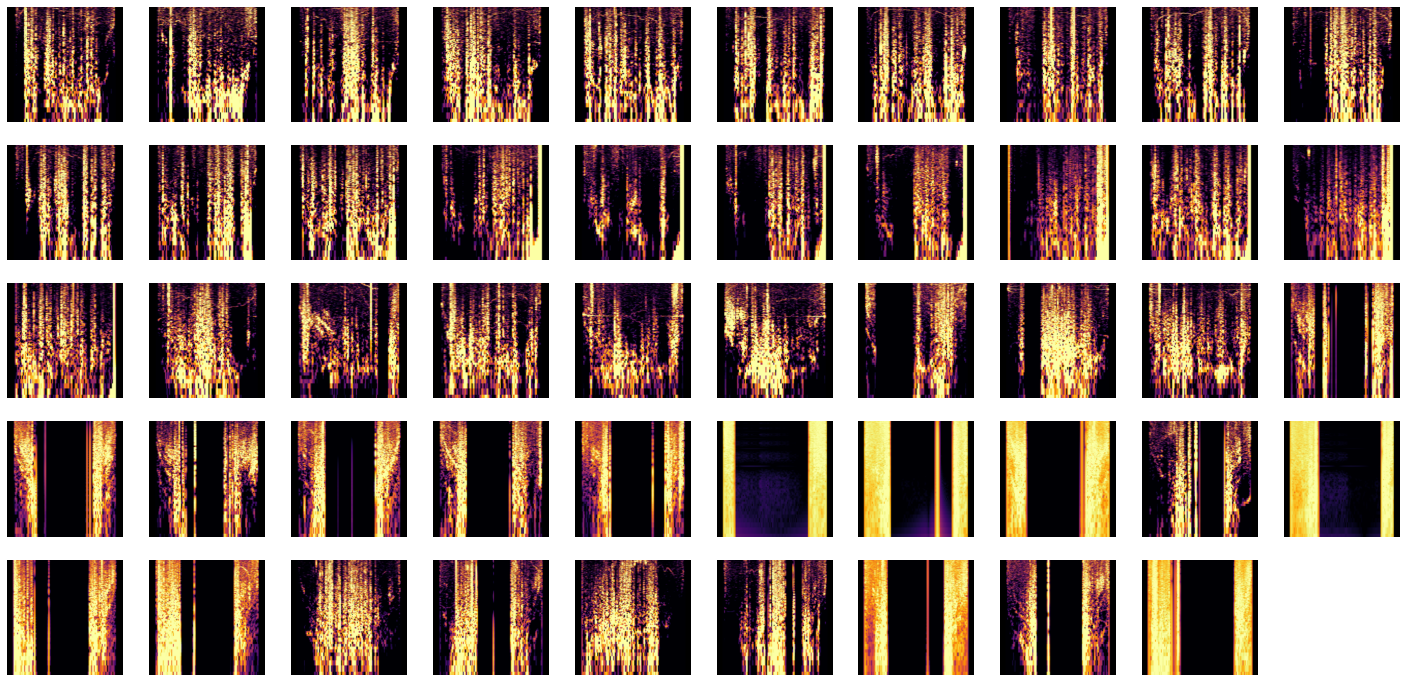

In [19]:
view_cluster(4,50)

Cluster 5 ------------------------------------------------------------------------------------------------------------------------------------------------------------------- 


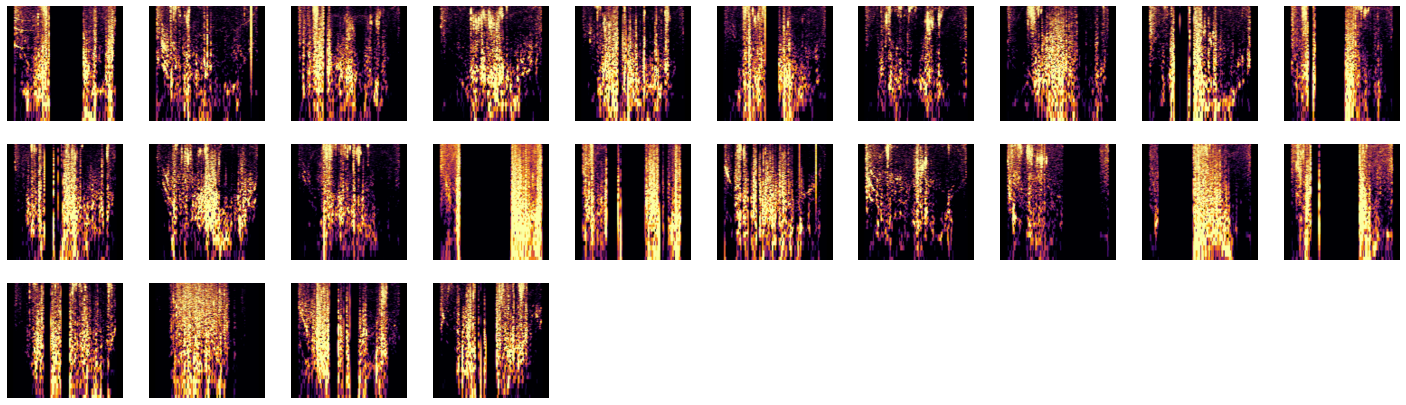

In [ ]:
view_cluster(5,50)

In [ ]:
view_cluster(6,50)

KeyError: ignored

<Figure size 1800x1800 with 0 Axes>